In [1]:
import importlib
import sys
sys.path.append("../")
sys.path.append('../../../')
import explainers.GNNBoundary.gnn_boundary.models as models
from torch_geometric.data import Data
from utility_functions import *
import torch
#sys.path.append("./explainers/XGNN")
#sys.path.append("./graph_generation")
#import HouseSet as HouseSet
from XGNNInterface  import XGNNInterface

C:\Users\hanne\anaconda3\envs\gnnboundary\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = models.LinearGCNClassifier(hidden_channels = 16, node_features = 3, num_classes=2)

In [3]:
import os
cwd = os.getcwd()
file_path = os.path.abspath(os.path.join(cwd, '../../../model/report_models/red_lr0.05.pt'))

In [4]:
model.load_state_dict(torch.load(file_path))

<All keys matched successfully>

In [5]:
mw = lambda x,e : model_wrapper(x,e,model=model)

In [6]:
encoding_dict = one_hot_encoding(3)
cgd = lambda nx_graph: convertNxToData(nx_graph, encoding_dict)

In [7]:
res = {0:{}, 1:{}}
for cl in [0,1]:
    for starting_node in [0,1,2]:
        explainer = XGNNInterface(5, 20, cl, 1000, 3, model = mw,\
                                      convertNxToData = cgd, starting_node=starting_node,\
                                          checkpoint=False)
        graph,prob = explainer.train()
        res[cl][starting_node] = (graph,prob)

Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model
Start training pipeline
Initializing Policy Nets
Initializing Policy Nets
loading the model


In [8]:
res

{0: {0: (Data(x=[1, 3], edge_index=[2, 0]), 4.208980044495547e-07),
  1: (Data(x=[5, 3], edge_index=[2, 7]), 1.0),
  2: (Data(x=[5, 3], edge_index=[2, 8]), 1.0)},
 1: {0: (Data(x=[5, 3], edge_index=[2, 6]), 0.9999995231628418),
  1: (Data(x=[5, 3], edge_index=[2, 8]), 0.9999997615814209),
  2: (Data(x=[5, 3], edge_index=[2, 8]), 1.0)}}

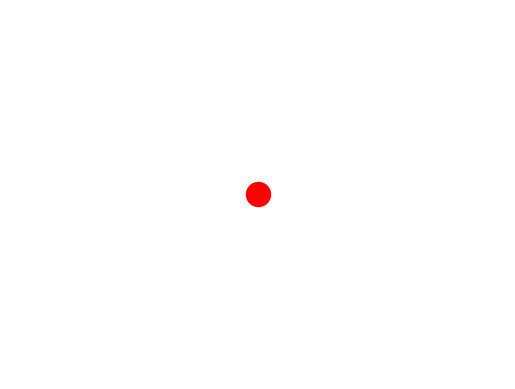

In [9]:
printGraph(res[0][0][0],"red_ratio_cl0_start0")

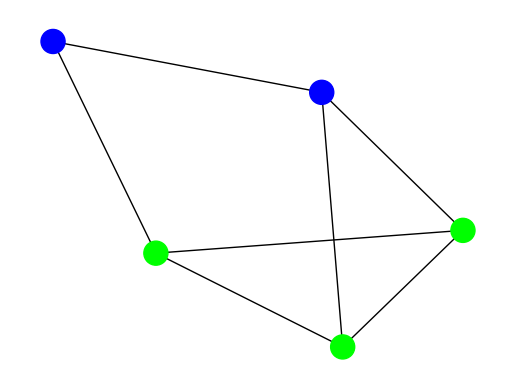

In [10]:
printGraph(res[0][1][0],"red_ratio_cl0_start1")

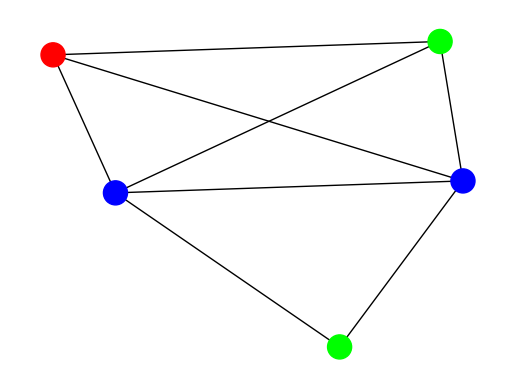

In [11]:
printGraph(res[0][2][0],"red_ratio_cl0_start2")

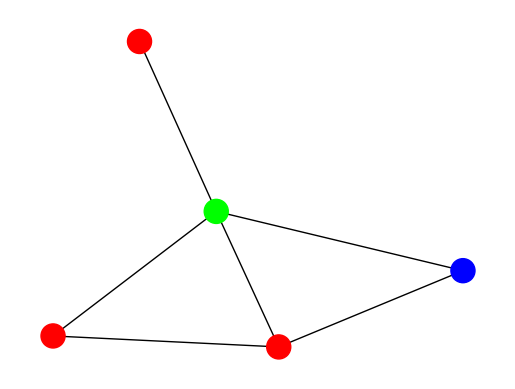

In [12]:
printGraph(res[1][0][0],"red_ratio_cl1_start0")

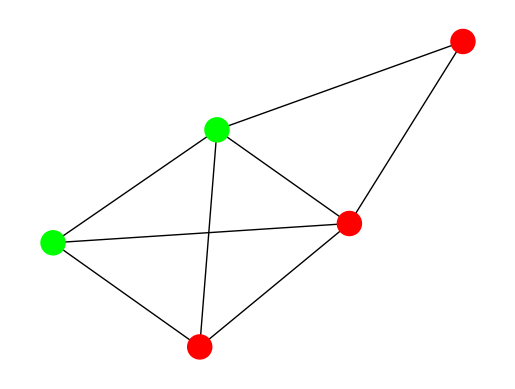

In [13]:
printGraph(res[1][1][0],"red_ratio_cl1_start1")

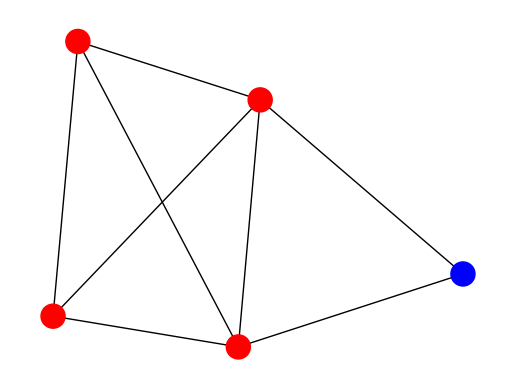

In [14]:
printGraph(res[1][2][0],"red_ratio_cl1_start2")